<a href="https://colab.research.google.com/github/aiaaee/FasionMNIST/blob/main/FasionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Device


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

### Imports

In [ ]:
import os
import sys
import shutil
import matplotlib.pyplot as plt
import torch
from torch import nn , optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from tqdm import tqdm
from torch.utils.data import random_split


In [ ]:
train_dataset = datasets.FashionMNIST(root='./data' , train=True , download=True , transform=ToTensor())
test_dataset = datasets.FashionMNIST(root='./data' , train=False , download=True , transform=ToTensor())
train_ds , val_ds = random_split(train_dataset , [50000 , 10000])


100%|██████████| 26421880/26421880 [00:01<00:00, 19600665.26it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 335285.77it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6290041.41it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17844857.02it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
# Each image in the Fashion MNIST dataset is 28 pixels in height and 28 pixels in width.
print("train Dataset : " , train_dataset.data.shape)
print("test  Dataset : " , test_dataset.data.shape)

train Dataset :  torch.Size([60000, 28, 28])
test  Dataset :  torch.Size([10000, 28, 28])


In [ ]:
## Hyperparameters
# * single star means that the variable will be a tuple of extra parameters that were supplied to the function.
input_size = [*train_dataset.data.shape[1:]]
number_epochs = 10
batch_size = 32
learning_rate = 0.01

In [ ]:
train_dataLoader = DataLoader(train_ds , batch_size=batch_size , shuffle=True)
val_dataLoader  =  DataLoader(val_ds , batch_size=batch_size , shuffle=True)
test_dataLoader = DataLoader(test_dataset , batch_size = batch_size)

In [ ]:
for data , label in train_dataLoader :
  print(data.size())
  print(label.size())
  break

torch.Size([32, 1, 28, 28])
torch.Size([32])


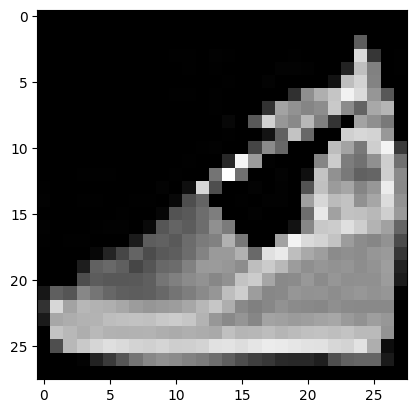

In [ ]:
sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
img, label = train_dataset[sample_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
class NN(nn.Module):
  def __init__(self , in_feature : int , out_feature : int , *args , **kwargs):
    super().__init__( *args , **kwargs)
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(in_feature , out_features=300)
    self.bn1 = nn.BatchNorm1d(300)
    self.fc2 = nn.Linear(in_features=300 , out_features=100)
    self.bn2 = self.bn2 = nn.BatchNorm1d(100)
    self.fc3 = nn.Linear(100 , out_features=out_feature)

  def forward(self , x:torch.Tensor):
    x = self.flatten(x)
    output = self.bn1(self.fc1(x))
    output = nn.GELU()(output)
    output = self.bn2(self.fc1(x))
    output = nn.GELU()(output)
    return self.fc3(output)



In [ ]:
model = NN(728 , 10).to(device)
model

NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=728, out_features=300, bias=True)
  (bn1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
counter = 1
for item in model.parameters():
  print("Model Parameters : " , counter)
  print(item.size())
  print(item.numel())
  counter += 1


Model Parameters :  1
torch.Size([300, 728])
218400
Model Parameters :  2
torch.Size([300])
300
Model Parameters :  3
torch.Size([300])
300
Model Parameters :  4
torch.Size([300])
300
Model Parameters :  5
torch.Size([100, 300])
30000
Model Parameters :  6
torch.Size([100])
100
Model Parameters :  7
torch.Size([100])
100
Model Parameters :  8
torch.Size([100])
100
Model Parameters :  9
torch.Size([10, 100])
1000
Model Parameters :  10
torch.Size([10])
10


In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# epoch_number = 10
# best_vloss = 1_000_000.
# train_losses, val_losses = [], []

# # Train & validate Network
# for epoch in range(number_epochs):

#     print(f'EPOCH {epoch + 1}:')

#     running_loss = 0.
#     last_loss = 0.

#     model.train(True)
#     for batch_idx, (data, targets) in enumerate(tqdm(train_dataLoader)):

#         data = data.to(device=device)
#         targets = targets.to(device=device)

#         # Make predictions for this batch (forward)
#         outputs = model(data)

#         # Compute the loss and its gradients
#         loss = criterion(outputs, targets)
#         optimizer.zero_grad()
#         loss.backward()

#         # Adjust learning weights
#         optimizer.step()

#         running_loss += loss.item()

#         if batch_idx % 500 == 499:
#             last_loss = running_loss / 500 # loss per batch
#             print(f'batch {batch_idx + 1} loss: {last_loss}')
#             running_loss = 0.

#     running_vloss = 0.0
#     model.eval()

#     epoch_number += 1


EPOCH 1:


  0%|          | 0/1563 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x784 and 728x300)